# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [3]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [6]:
def display_images(batch):
    # TODO - Your implementation here
    # Extract features from the tf record and convert to numpy 
    img = batch['image'].numpy()
    bbox = batch['groundtruth_boxes'].numpy()
    cls = batch['groundtruth_classes'].numpy()
    shp = img.shape
    
    f,ax = plt.subplots(1, figsize=(20,10))
    cdict = {1:[1,0,0], 2:[0,0,1], 4:[0,1,0]}
    
    for bbx,cl in zip(bbox, cls):
        y1,x1,y2,x2 = bbx
        # Denormalize the bbox co-ordinates
        y1 = y1*shp[0]
        y2 = y2*shp[0]
        x1 = x1*shp[1]
        x2 = x2*shp[1]
        # Add the bounding boxes to the image
        rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, facecolor= 'none', edgecolor=cdict[cl])
        ax.add_patch(rect)
    fin_plot = plt.imshow(img)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

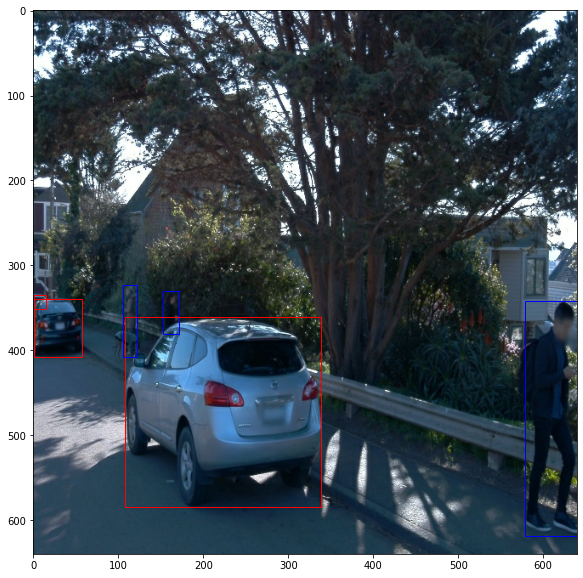

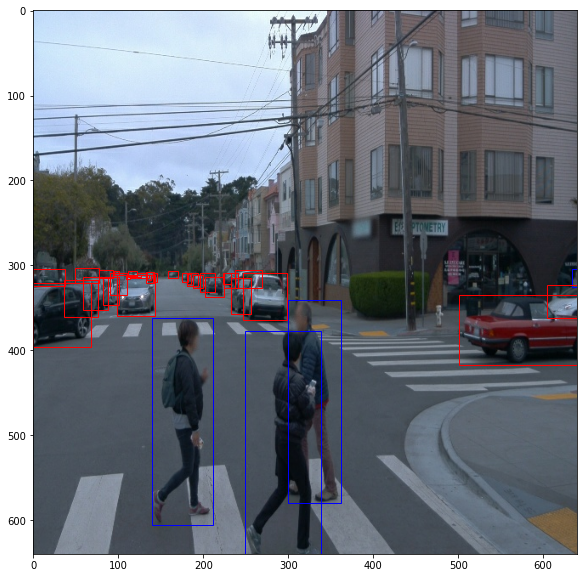

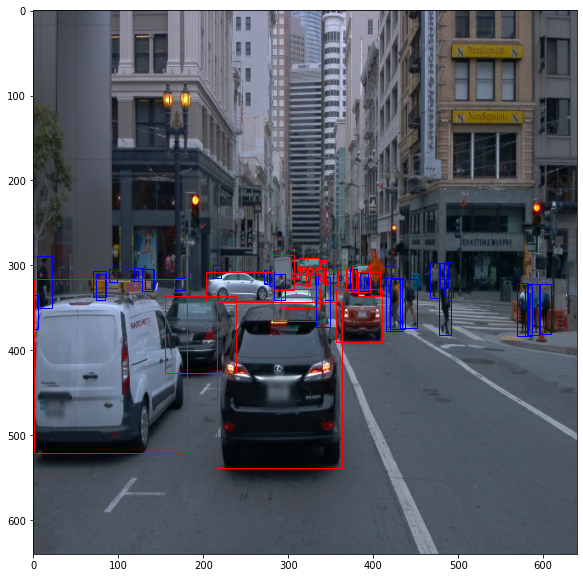

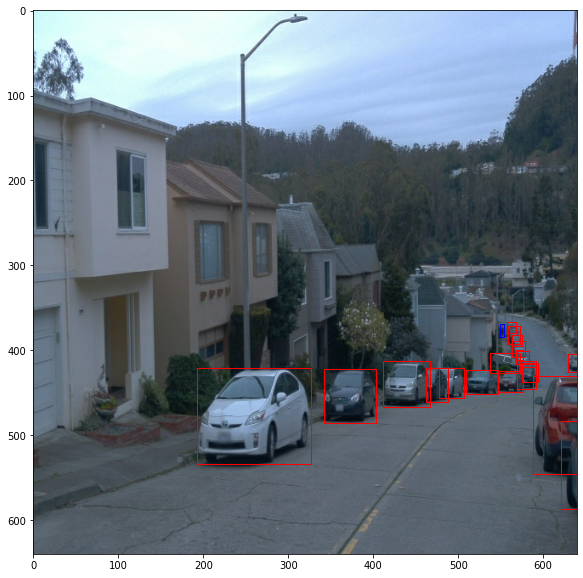

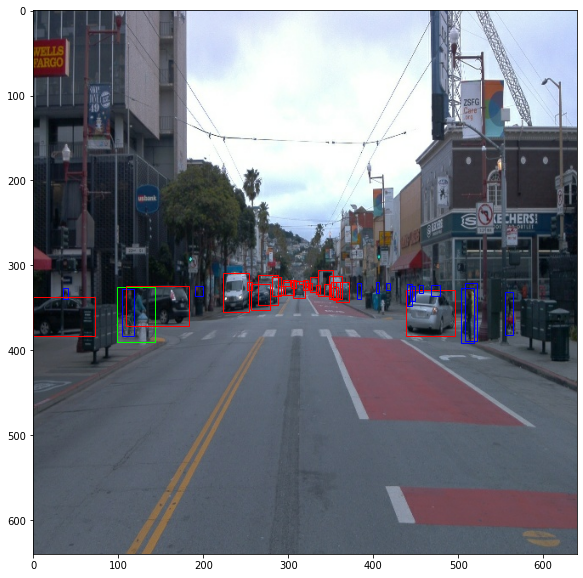

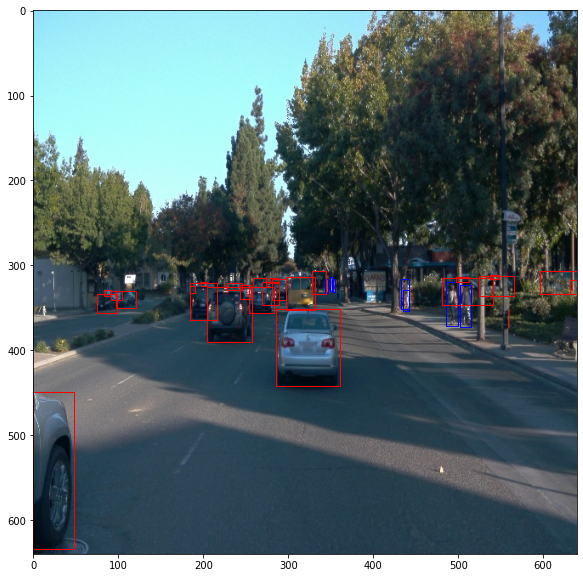

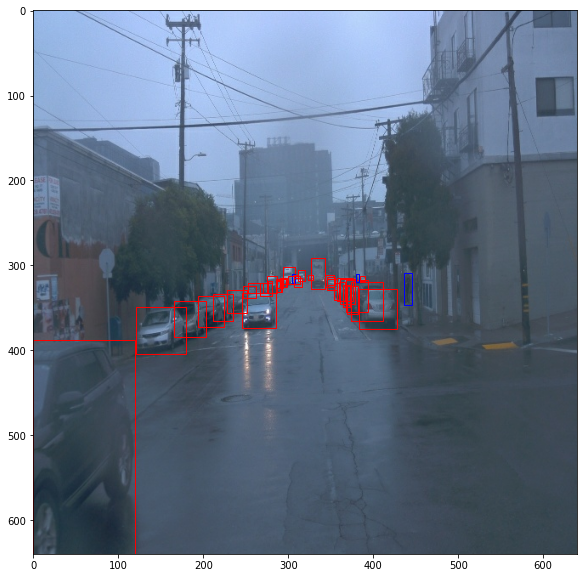

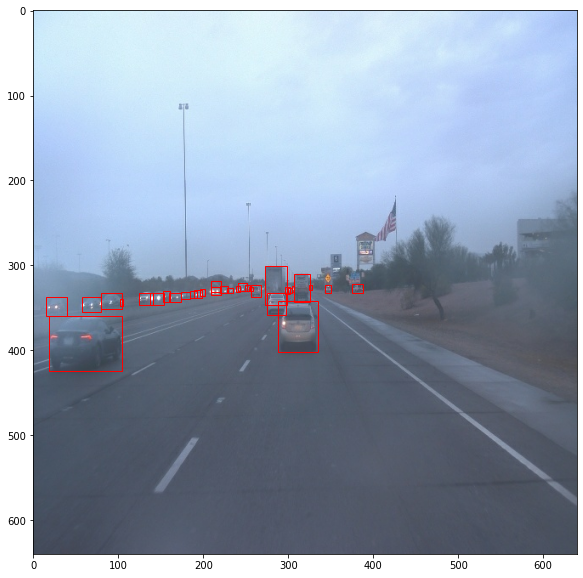

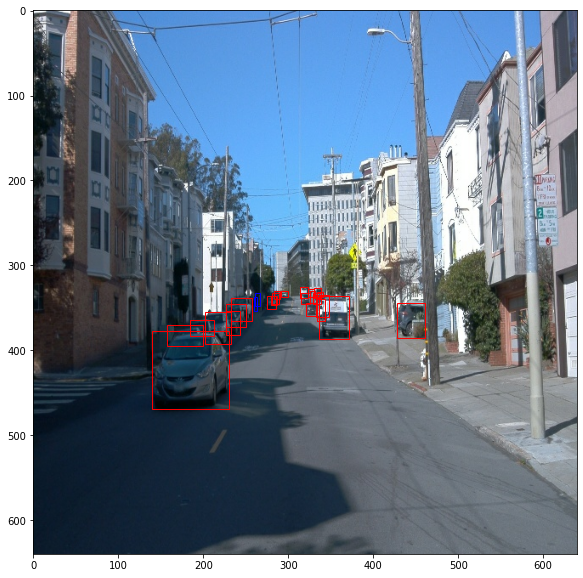

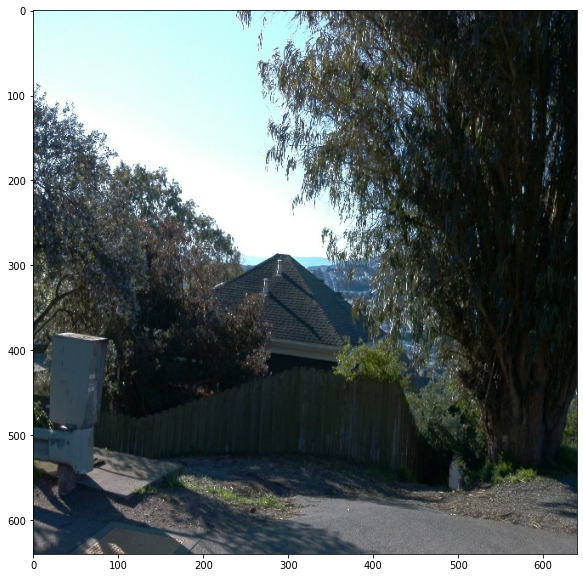

In [7]:
# Display 10 random images in dataset
# Randomly shuffle the dataset
dataset.shuffle(100)

# Take selects given number of samples from dataset
for batch in dataset.take(10):
    display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

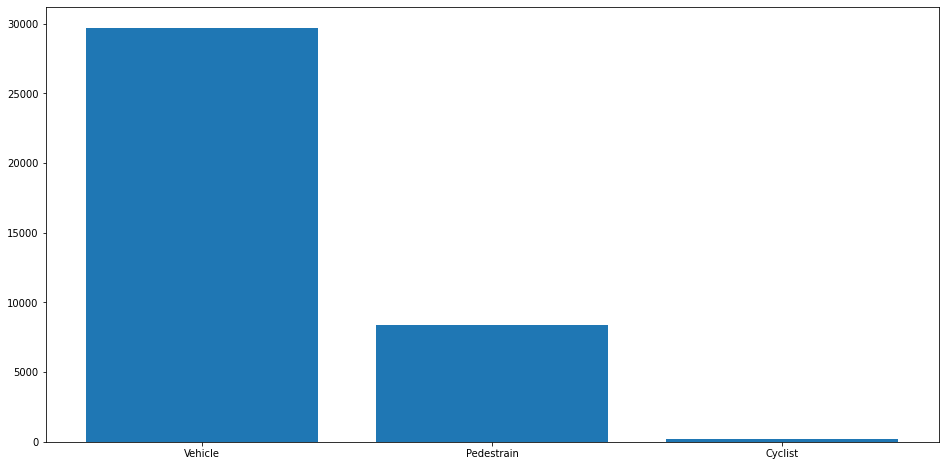

Dataset used for the training has 29710 vehicles, 8355 pedestrians and 214 cyclists annotated


In [17]:
import os
from collections import Counter

# Dictionary for count classes
cls_cnt = {1:0, 2:0, 4:0}

# Make a list of tf record filenames
tffiles = os.listdir('/home/workspace/data/train/')
for recds in tffiles:
    dat = tf.data.TFRecordDataset('/home/workspace/data/train/'+recds)
    # Read values with numpy format
    for rec in dat.as_numpy_iterator():
        ex = tf.train.Example()
        ex.ParseFromString(rec)
        for path,val in ex.features.feature.items():
            if path == 'image/object/class/label':
                value = val.int64_list.value
                cls_cnt = Counter(cls_cnt)+Counter(value)
# Plot the bar graph
plt_map = {'Vehicle': cls_cnt[1], 'Pedestrain': cls_cnt[2], 'Cyclist': cls_cnt[4]}
plt.figure(figsize = (16,8))
plt.bar(plt_map.keys(),plt_map.values())
plt.show()
print("Dataset used for the training has {} vehicles, {} pedestrians and {} cyclists annotated" .format(cls_cnt[1], cls_cnt[2], cls_cnt[4]))